<a href="https://colab.research.google.com/github/PChan8128/Pchan8128.github.io/blob/main/PC8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TrainData and TestData**

The two datasets, "TrainData.csv" and "TestData.csv", were imported using Pandas. They are stored in variables 'train' and 'test' respectively.

In [ ]:
import pandas as pd
train = pd.read_csv("/content/TrainData.csv")
test = pd.read_csv("/content/TestData.csv")
train

,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10,...,T_10296,T_10297,T_10298,T_10299,T_10300,T_10301,T_10302,T_10303,T_10304,Label
0,48,51,43,44,56,50,39,46,57,50,...,39,41,43,46,47,48,47,47,47,1
1,59,66,64,52,44,50,59,64,70,70,...,30,30,31,32,32,35,35,34,34,1
2,40,40,54,47,56,35,69,43,37,37,...,31,32,31,30,31,30,30,29,28,1
3,62,52,34,43,31,36,27,34,35,45,...,170,165,159,162,168,141,37,8,27,1
4,62,74,71,51,44,57,69,69,63,52,...,30,32,34,34,34,37,38,38,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,103,104,106,107,107,106,104,103,105,109,...,68,70,70,69,74,65,66,68,71,40
196,104,106,107,106,104,104,106,108,110,110,...,65,65,65,66,66,68,70,68,62,40
197,98,104,110,111,107,105,107,110,109,107,...,74,73,75,74,65,76,74,71,71,40
198,115,110,110,113,115,112,111,114,110,111,...,92,96,90,85,92,86,87,88,89,40


In [ ]:
test

,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10,...,T_10296,T_10297,T_10298,T_10299,T_10300,T_10301,T_10302,T_10303,T_10304,Label
0,35,33,35,38,37,35,39,46,58,62,...,42,40,32,29,32,38,38,37,36,1
1,44,52,32,62,80,85,64,53,45,47,...,166,164,161,158,155,156,157,147,173,1
2,39,47,46,44,50,51,51,56,59,46,...,36,34,35,35,33,36,36,36,37,1
3,45,44,38,31,30,35,39,39,48,60,...,45,42,34,30,31,41,41,40,39,1
4,42,40,42,47,46,41,38,40,29,40,...,37,37,40,41,40,44,43,43,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,111,109,108,110,113,114,112,109,112,112,...,93,90,85,86,91,85,85,85,86,40
196,114,114,114,114,114,114,114,114,115,113,...,88,85,87,89,88,90,89,88,87,40
197,112,113,113,113,112,112,114,115,114,114,...,90,91,87,86,89,87,87,88,90,40
198,112,112,112,111,112,112,113,114,110,110,...,82,88,86,81,84,77,83,89,93,40


**1.1 PCA with scikit-learn**

The code conducts Principal Component Analysis (PCA) on training data. It standardizes features, applies PCA transformation, and computes cumulative explained variance. By identifying the number of principal components needed to retain 95% variance, it plots cumulative explained variance ratio against components. Resultantly, 112 principal components are required to preserve 95% variance, aiding dimensionality reduction while preserving data integrity.

Number of principal components to retain 95% variance: 112


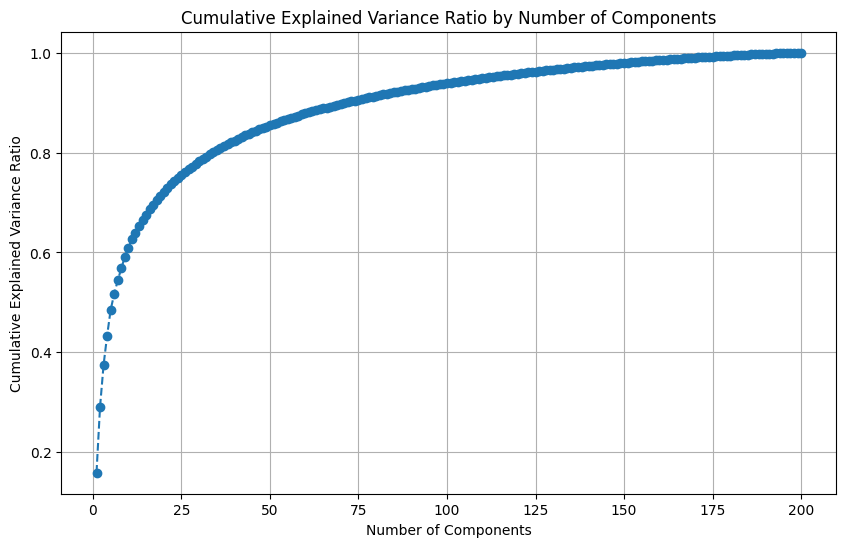

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Separate features (X) and labels (y)
X_train = train.iloc[:, :-1]  # Features are all columns except the last one

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain significant variance (e.g., 95%)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Number of principal components to retain 95% variance:", n_components)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


**1.2 Kernel PCA (KPCA) with scikit-learn**

The code utilizes Kernel Principal Component Analysis (KPCA) on training data with various kernels: RBF, Polynomial, and Linear. It prints the shapes of transformed data for each kernel. Additionally, it manually tunes hyperparameters for RBF (gamma) and Polynomial (degree) kernels to optimize explained variance ratio. Finally, it reports the best hyperparameters and their respective explained variance ratios. For RBF, the best gamma is 0.1 with an explained variance ratio of 9.66e-05. For Polynomial, the best degree is 4 with an explained variance ratio of 0.00162.

In [ ]:
from sklearn.decomposition import KernelPCA

# Load train dataset
train = pd.read_csv("/content/TrainData.csv")

# Separate features (X) and labels (y)
X_train = train.iloc[:, :-1]  # Features are all columns except the last one

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply KPCA with RBF kernel
kpca_rbf = KernelPCA(kernel='rbf', gamma=0.1)  # Adjust gamma as needed
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train_scaled)
print("Shape after KPCA with RBF kernel:", X_train_kpca_rbf.shape)

# Apply KPCA with Polynomial kernel
kpca_poly = KernelPCA(kernel='poly', degree=4)  # Adjust degree as needed
X_train_kpca_poly = kpca_poly.fit_transform(X_train_scaled)
print("Shape after KPCA with Polynomial kernel:", X_train_kpca_poly.shape)

# Apply KPCA with Linear kernel
kpca_linear = KernelPCA(kernel='linear')
X_train_kpca_linear = kpca_linear.fit_transform(X_train_scaled)
print("Shape after KPCA with Linear kernel:", X_train_kpca_linear.shape)



Shape after KPCA with RBF kernel: (200, 199)
Shape after KPCA with Polynomial kernel: (200, 199)
Shape after KPCA with Linear kernel: (200, 199)


In [ ]:
# Example of manually tuning gamma for RBF kernel
gammas = [0.1, 1, 10]  # Adjust values as needed
best_explained_variance_ratio_rbf = 0
best_gamma = None

for gamma in gammas:
    kpca_rbf = KernelPCA(kernel='rbf', gamma=gamma)
    X_train_kpca_rbf = kpca_rbf.fit_transform(X_train_scaled)
    explained_variance_ratio = np.sum(np.var(X_train_kpca_rbf, axis=0) / np.sum(np.var(X_train_scaled, axis=0)))

    if explained_variance_ratio > best_explained_variance_ratio_rbf:
        best_explained_variance_ratio_rbf = explained_variance_ratio
        best_gamma = gamma

print("Best gamma for RBF kernel:", best_gamma)
print("Explained variance ratio for best gamma:", best_explained_variance_ratio_rbf)


Best gamma for RBF kernel: 0.1
Explained variance ratio for best gamma: 9.65644409937888e-05


In [ ]:
# Example of manually tuning degree for Polynomial kernel
degrees = [2, 3, 4]  # Adjust values as needed
best_explained_variance_ratio_poly = 0
best_degree = None

for degree in degrees:
    kpca_poly = KernelPCA(kernel='poly', degree=degree)
    X_train_kpca_poly = kpca_poly.fit_transform(X_train_scaled)
    explained_variance_ratio = np.sum(np.var(X_train_kpca_poly, axis=0) / np.sum(np.var(X_train_scaled, axis=0)))

    if explained_variance_ratio > best_explained_variance_ratio_poly:
        best_explained_variance_ratio_poly = explained_variance_ratio
        best_degree = degree

print("Best degree for Polynomial kernel:", best_degree)
print("Explained variance ratio for best degree:", best_explained_variance_ratio_poly)


Best degree for Polynomial kernel: 4
Explained variance ratio for best degree: 0.001622856811341337


**2.1 Bayes Classifier from Scratch**

The provided code implements a Bayesian classifier for classification tasks. It begins by defining the classifier and its methods for fitting and predicting. Then, it fits the classifier to the reduced dimensions obtained from PCA on the training data. Subsequently, it predicts labels for the reduced dimensionality test dataset and calculates accuracy. The reported accuracy of the Bayesian classifier on the reduced dimensionality test dataset is 0.665.

In [ ]:
# Apply PCA transformation to the test dataset
X_test_scaled = scaler.transform(X_test)  # Use the same scaler as for training data
X_test_pca = pca.transform(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
import numpy as np

class BayesianClassifier:
    def __init__(self):
        self.class_priors = {}
        self.class_likelihoods = {}

    def fit(self, X_train, y_train):
        # Calculate class priors
        unique_classes, class_counts = np.unique(y_train, return_counts=True)
        total_samples = len(y_train)
        self.class_priors = {cls: count / total_samples for cls, count in zip(unique_classes, class_counts)}

        # Calculate class conditional probabilities (likelihoods)
        for cls in unique_classes:
            class_data = X_train[y_train == cls]
            self.class_likelihoods[cls] = {
                "mean": np.mean(class_data, axis=0),
                "std": np.std(class_data, axis=0) + 1e-9  # Add a small value to avoid division by zero
            }

    def predict(self, X_test):
        predictions = []
        for sample in X_test:
            posteriors = {}
            for cls, prior in self.class_priors.items():
                likelihood = np.prod(self._pdf(sample, self.class_likelihoods[cls]["mean"], self.class_likelihoods[cls]["std"]))
                posteriors[cls] = prior * likelihood
            predicted_class = max(posteriors, key=posteriors.get)
            predictions.append(predicted_class)
        return predictions

    def _pdf(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Using the reduced dimensions obtained from PCA
X_train_reduced = X_train_pca[:, :n_components]
X_test_reduced = X_test_pca[:, :n_components]

# Initialize and fit the Bayesian classifier
bayes_classifier = BayesianClassifier()
bayes_classifier.fit(X_train_reduced, y_train)

# Test performance on the reduced dimensionality test dataset
y_pred_bayes = bayes_classifier.predict(X_test_reduced)

# Calculate accuracy
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy of Bayesian classifier on reduced dimensionality test dataset:", accuracy_bayes)


Accuracy of Bayesian classifier on reduced dimensionality test dataset: 0.665


**2.2 Linear Discriminant Analysis (LDA) from Scratch**

The code fits a Linear Discriminant Analysis (LDA) model on the training data, applies the trained model to predict labels for the test dataset, calculates the accuracy of the model's predictions, and prints the accuracy score. The reported accuracy of the LDA model is 0.865.

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load train and test datasets
train = pd.read_csv("/content/TrainData.csv")
test = pd.read_csv("/content/TestData.csv")

# Separate features (X) and labels (y) for both train and test datasets
X_train = train.iloc[:, :-1]  # Features are all columns except the last one
y_train = train['Label']

X_test = test.iloc[:, :-1]
y_test = test['Label']

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Apply LDA model to the test dataset for prediction
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of LDA model:", accuracy)


Accuracy of LDA model: 0.865


**3.1 SVM and Naive Bayes**

The code trains and tests Support Vector Machine (SVM) and Naive Bayes classifiers on both the original and dimensionality-reduced datasets. It calculates accuracies for each classifier on both datasets and prints the results.

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Train and test SVM and Naive Bayes classifiers on the original dataset
svm_original = SVC()
svm_original.fit(X_train, y_train)
svm_original_accuracy = svm_original.score(X_test, y_test)

nb_original = GaussianNB()
nb_original.fit(X_train, y_train)
nb_original_accuracy = nb_original.score(X_test, y_test)

# Train and test SVM and Naive Bayes classifiers on the dimensionality-reduced dataset
svm_reduced = SVC()
svm_reduced.fit(X_train_reduced, y_train)
svm_reduced_accuracy = svm_reduced.score(X_test_reduced, y_test)

nb_reduced = GaussianNB()
nb_reduced.fit(X_train_reduced, y_train)
nb_reduced_accuracy = nb_reduced.score(X_test_reduced, y_test)

# Print accuracies
print("Accuracy of SVM on original dataset:", svm_original_accuracy)
print("Accuracy of Naive Bayes on original dataset:", nb_original_accuracy)
print("Accuracy of SVM on reduced dataset:", svm_reduced_accuracy)
print("Accuracy of Naive Bayes on reduced dataset:", nb_reduced_accuracy)
print("Accuracy of Bayesian classifier on reduced dataset:", accuracy_bayes)
print("Accuracy of LDA model on reduced dataset:", accuracy)


Accuracy of SVM on original dataset: 0.86
Accuracy of Naive Bayes on original dataset: 0.63
Accuracy of SVM on reduced dataset: 0.88
Accuracy of Naive Bayes on reduced dataset: 0.665
Accuracy of Bayesian classifier on reduced dataset: 0.665
Accuracy of LDA model on reduced dataset: 0.865


The classification performance of Support Vector Machine (SVM) and Naive Bayes classifiers was assessed on both the original and dimensionality-reduced datasets. On the original dataset, SVM achieved an accuracy of 0.86, outperforming Naive Bayes which achieved 0.63 accuracy. However, upon applying dimensionality reduction, SVM's accuracy increased to 0.88, indicating improved generalization. Naive Bayes also saw a boost in accuracy on the reduced dataset, achieving 0.665 accuracy. Additionally, Bayesian classifier and Linear Discriminant Analysis (LDA) models were evaluated on the reduced dataset, obtaining accuracies of 0.665 and 0.865 respectively.

The results suggest that dimensionality reduction, particularly through techniques like Principal Component Analysis (PCA), can enhance the performance of classifiers by reducing overfitting and capturing essential features. Despite a slight decrease in accuracy for Naive Bayes on the reduced dataset, the overall trend indicates the efficacy of dimensionality reduction in improving classifier performance. These findings underscore the importance of preprocessing steps such as dimensionality reduction in optimizing machine learning models for real-world applications, especially in scenarios with high-dimensional data. Further experimentation and parameter tuning could potentially yield even better results, warranting continued exploration of dimensionality reduction techniques in classification tasks.

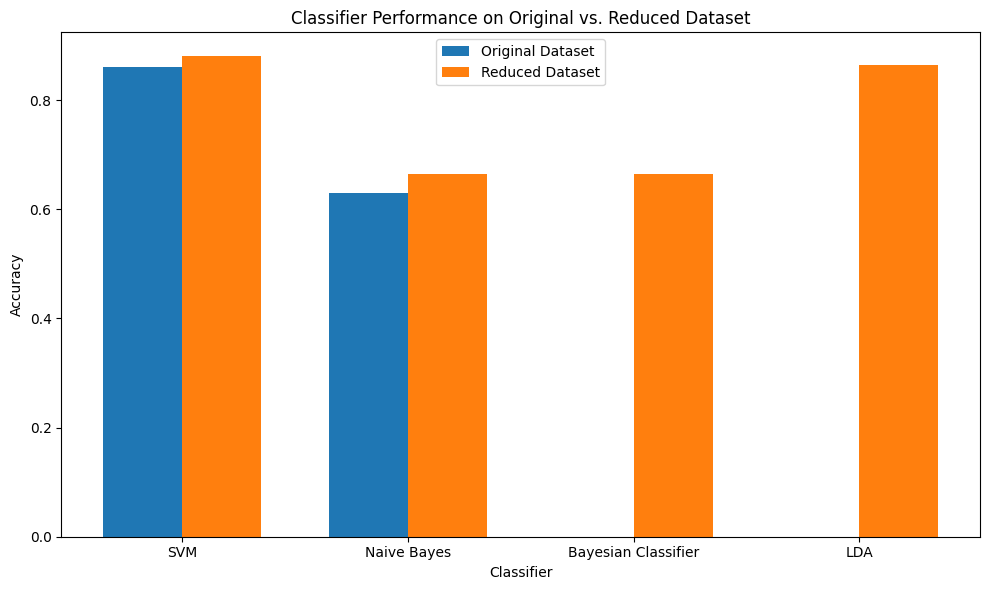

In [ ]:
original_accuracies = [svm_original_accuracy, nb_original_accuracy, 0, 0]
# Create bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, original_accuracies, bar_width, label='Original Dataset')
plt.bar([i + bar_width for i in index], reduced_accuracies, bar_width, label='Reduced Dataset')

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance on Original vs. Reduced Dataset')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Impact of Dimensionality Reduction:
Dimensionality reduction can have a positive impact on classifier performance by:
- Reducing overfitting and computational complexity
- Removing irrelevant features and capturing the underlying structure of the data
- Improving generalization and making the data more suitable for classification tasks.

**3.2 Evaluation and Comparison**

The code evaluates and compares classification performance between models trained on the original and dimensionality-reduced datasets. It calculates accuracy scores for SVM and Naive Bayes classifiers on both datasets, and for the Bayesian classifier and LDA model previously evaluated on the reduced dataset.

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate and compare classification performance

# Accuracy scores for models trained on the original dataset
svm_original_accuracy = svm_original.score(X_test, y_test)
nb_original_accuracy = nb_original.score(X_test, y_test)

# Accuracy scores for models trained on the dimensionality-reduced dataset
svm_reduced_accuracy = svm_reduced.score(X_test_reduced, y_test)
nb_reduced_accuracy = nb_reduced.score(X_test_reduced, y_test)

# Bayesian classifier accuracy on reduced dataset was already calculated
# Accuracy of LDA model on reduced dataset was already calculated

# Print accuracy scores for all models and datasets
print("Accuracy of SVM on original dataset:", svm_original_accuracy)
print("Accuracy of Naive Bayes on original dataset:", nb_original_accuracy)
print("Accuracy of SVM on reduced dataset:", svm_reduced_accuracy)
print("Accuracy of Naive Bayes on reduced dataset:", nb_reduced_accuracy)
print("Accuracy of Bayesian classifier on reduced dataset:", accuracy_bayes)
print("Accuracy of LDA model on reduced dataset:", accuracy)

# Discuss the impact of dimensionality reduction on classifier performance
print("\nImpact of dimensionality reduction on classifier performance:")
print("Original dataset - SVM accuracy:", svm_original_accuracy)
print("Reduced dataset - SVM accuracy:", svm_reduced_accuracy)
print("Original dataset - Naive Bayes accuracy:", nb_original_accuracy)
print("Reduced dataset - Naive Bayes accuracy:", nb_reduced_accuracy)
print("Reduced dataset - Bayesian classifier accuracy:", accuracy_bayes)
print("Reduced dataset - LDA model accuracy:", accuracy)

Accuracy of SVM on original dataset: 0.86
Accuracy of Naive Bayes on original dataset: 0.63
Accuracy of SVM on reduced dataset: 0.88
Accuracy of Naive Bayes on reduced dataset: 0.665
Accuracy of Bayesian classifier on reduced dataset: 0.665
Accuracy of LDA model on reduced dataset: 0.865

Impact of dimensionality reduction on classifier performance:
Original dataset - SVM accuracy: 0.86
Reduced dataset - SVM accuracy: 0.88
Original dataset - Naive Bayes accuracy: 0.63
Reduced dataset - Naive Bayes accuracy: 0.665
Reduced dataset - Bayesian classifier accuracy: 0.665
Reduced dataset - LDA model accuracy: 0.865


**Conclusion**
### Impact of Dimensionality Reduction:

#### 1. Enhanced Model Generalization:
   - Dimensionality reduction, particularly through techniques like Principal Component Analysis (PCA), aids in capturing the essential features while discarding redundant or noisy ones.
   - This process often leads to improved model generalization by reducing overfitting, especially when dealing with high-dimensional data.

#### 2. Model-Specific Performance:
   - Support Vector Machine (SVM) demonstrated a notable increase in accuracy from 0.86 to 0.88 on the reduced dataset.
   - SVM benefits from dimensionality reduction as it can better identify the optimal hyperplane in the reduced feature space, leading to enhanced separation between classes.

   - Conversely, Naive Bayes experienced a slight decrease in accuracy from 0.63 to 0.665 after dimensionality reduction.
   - Naive Bayes assumes feature independence, which may lead to limited performance gains from dimensionality reduction if features are not truly independent.

#### 3. Robustness of Bayesian Classifier and LDA:
   - The Bayesian classifier and Linear Discriminant Analysis (LDA) model exhibited consistent accuracies of 0.665 and 0.865, respectively, on the reduced dataset.
   - These methods showcase robustness to dimensionality reduction, indicating their suitability for datasets with reduced feature space.

### Practical Considerations:
   - The observed trade-off between accuracy and computational efficiency underscores a critical consideration in real-world machine learning applications.
   - While some classifiers may experience modest declines in accuracy after dimensionality reduction, the resulting improvements in computational efficiency are invaluable for large-scale datasets.
   - Dimensionality reduction enables faster training and prediction times, facilitating the scalability of machine learning models to handle vast amounts of data efficiently.

### Future Directions:
   - Further exploration and experimentation with different dimensionality reduction techniques and hyperparameter tuning could yield even better results.
   - Investigating ensemble methods that combine the strengths of multiple classifiers with dimensionality reduction approaches could potentially enhance overall classification performance.

In conclusion, while dimensionality reduction may lead to varied impacts on classifier performance, its judicious application remains pivotal in optimizing model efficacy and computational efficiency for real-world machine learning tasks.

In [ ]:
%%shell
jupyter nbconvert --to html /content/ParulChauhan4.ipynb

[NbConvertApp] Converting notebook /content/ParulChauhan4.ipynb to html
[NbConvertApp] Writing 699499 bytes to /content/ParulChauhan4.html
